In [1]:
from __future__ import print_function
import os
import pandas as pd
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles.Month

In [4]:
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 2)


In [5]:
air_miles.head(10)

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0
1963-06,1963-06,9644.0
1963-07,1963-07,10466.0
1963-08,1963-08,10748.0
1963-09,1963-09,9963.0


In [6]:
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':
                          'Air miles flown'
                         },
                inplace=True
                )

In [7]:
air_miles.head()

,Month,Air miles flown
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


In [8]:
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


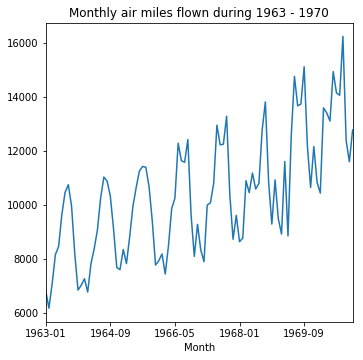

In [9]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')
plt.savefig('plots/Section 2/_02_12.png', format='png', dpi=300)

In [10]:
adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

In [11]:
print('p-val of the ADF test in air miles flown:', adf_result[1])

p-val of the ADF test in air miles flown: 0.994502281123
